In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
%cd '/content/drive/MyDrive/CV-crowd-flow-estimation-/notebooks'
!pwd

In [1]:
import sys
import os
# Add project root to sys.path (one directory up from the notebook)
project_root = os.path.abspath(os.path.join(os.getcwd(), ".."))
if project_root not in sys.path:
    sys.path.insert(0, project_root)

from src.data_loader import ShanghaiTechShanghaiTechDataModule
from src.train import train_model
from src.utils import plot_density_predictions, plot_all_decoder_predictions
from src.models import get_model

In [ ]:
# 1) Prepare the data
data_module = ShanghaiTechShanghaiTechDataModule(
    data_folder="../data/ShanghaiTech",
    part="part_A",
    validation_split=0.1,
    sigma=5,
    return_count=False,
    batch_size=8,
    num_workers=4,
    input_size=(384, 384),
    density_map_size=(192, 192),
)

Using Apple MPS


: 

In [ ]:
model = train_model(
    data_module,
    model_name="unet",
    epochs=50,
    lr=1e-5,
    pretrained=True,
    save_path="../models/pth/part_A_unet_64_4.pth",
    depth=4,
    num_filters=64,
)

Using Apple MPS


Epoch 1/50 [Train]:   0%|          | 0/34 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[unet] Epoch 1/50  Train MSE: 0.083235, MAE: 0.016152  Val   MSE: 0.022114, MAE: 0.009948


[unet] Epoch 2/50  Train MSE: 0.030358, MAE: 0.009696  Val   MSE: 0.018336, MAE: 0.007529


[unet] Epoch 3/50  Train MSE: 0.011345, MAE: 0.005480  Val   MSE: 0.008815, MAE: 0.004645


[unet] Epoch 4/50  Train MSE: 0.005220, MAE: 0.003373  Val   MSE: 0.004031, MAE: 0.002870


### Resnet Density Map

#### Depth 4

In [ ]:
model = train_model(
    data_module,
    model_name="resnet50",
    epochs=15,
    lr=1e-4,
    pretrained=True,
    save_path="../models/pth/part_A_resnet50_15.pth"
)


In [ ]:
plot_density_predictions(
    model,
    data_module.test_dataloader(),
    device = "mps",
)

#### Depth 2

Using Apple MPS


Epoch 1/15 [Train]:   0%|          | 0/34 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[resnet50] Epoch 1/15  Train MSE: 0.009545, MAE: 0.003033  Val   MSE: 0.000955, MAE: 0.001127


[resnet50] Epoch 2/15  Train MSE: 0.000767, MAE: 0.001073  Val   MSE: 0.000645, MAE: 0.000951


[resnet50] Epoch 3/15  Train MSE: 0.000610, MAE: 0.000974  Val   MSE: 0.000625, MAE: 0.000889


[resnet50] Epoch 4/15  Train MSE: 0.000493, MAE: 0.000860  Val   MSE: 0.000556, MAE: 0.000832


[resnet50] Epoch 5/15  Train MSE: 0.000532, MAE: 0.000909  Val   MSE: 0.000511, MAE: 0.000782


[resnet50] Epoch 6/15  Train MSE: 0.000452, MAE: 0.000837  Val   MSE: 0.000466, MAE: 0.000782


[resnet50] Epoch 7/15  Train MSE: 0.000345, MAE: 0.000764  Val   MSE: 0.000392, MAE: 0.000695


[resnet50] Epoch 8/15  Train MSE: 0.000322, MAE: 0.000714  Val   MSE: 0.000486, MAE: 0.000741


[resnet50] Epoch 9/15  Train MSE: 0.000347, MAE: 0.000769  Val   MSE: 0.000473, MAE: 0.000776


[resnet50] Epoch 10/15  Train MSE: 0.000273, MAE: 0.000682  Val   MSE: 0.000436, MAE: 0.000670


[resnet50] Epoch 11/15  Train MSE: 0.000250, MAE: 0.000673  Val   MSE: 0.000428, MAE: 0.000691


[resnet50] Epoch 12/15  Train MSE: 0.000225, MAE: 0.000613  Val   MSE: 0.000431, MAE: 0.000642


[resnet50] Epoch 13/15  Train MSE: 0.000235, MAE: 0.000663  Val   MSE: 0.000378, MAE: 0.000626


[resnet50] Epoch 14/15  Train MSE: 0.000206, MAE: 0.000640  Val   MSE: 0.000419, MAE: 0.000683


[resnet50] Epoch 15/15  Train MSE: 0.000183, MAE: 0.000595  Val   MSE: 0.000395, MAE: 0.000660
Saved weights to ../models/pth/part_A_resnet50.pth


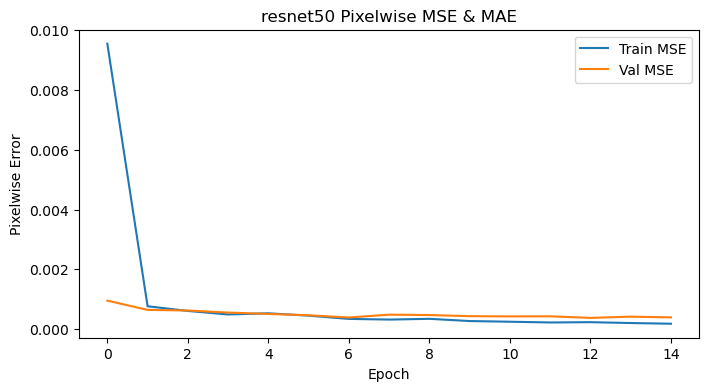

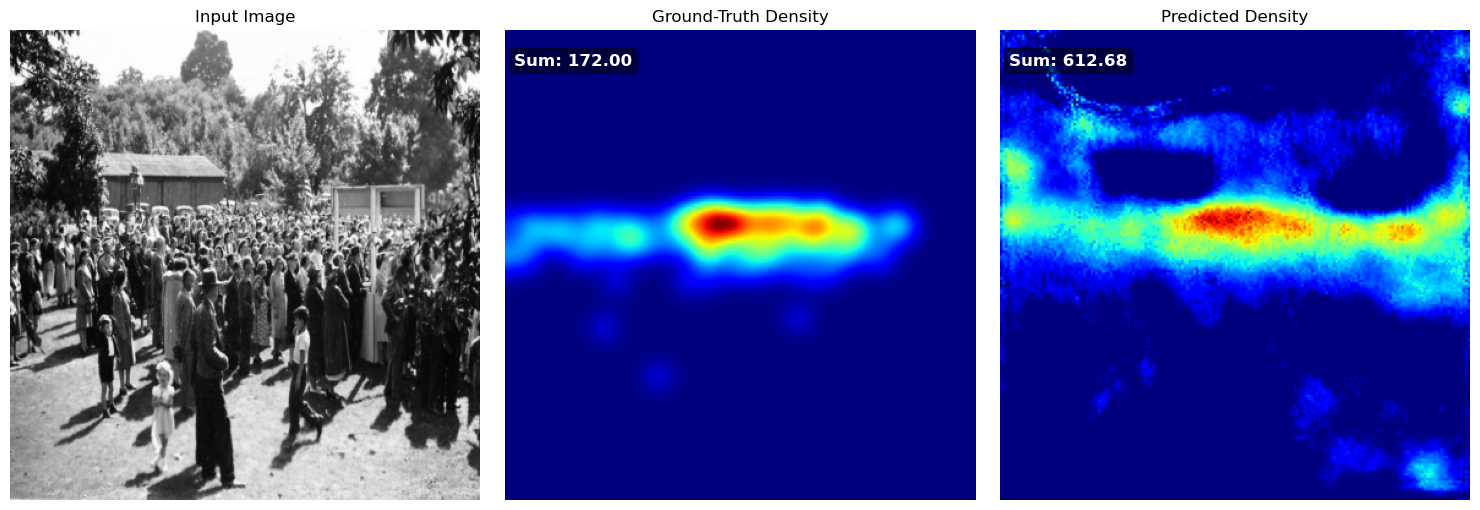

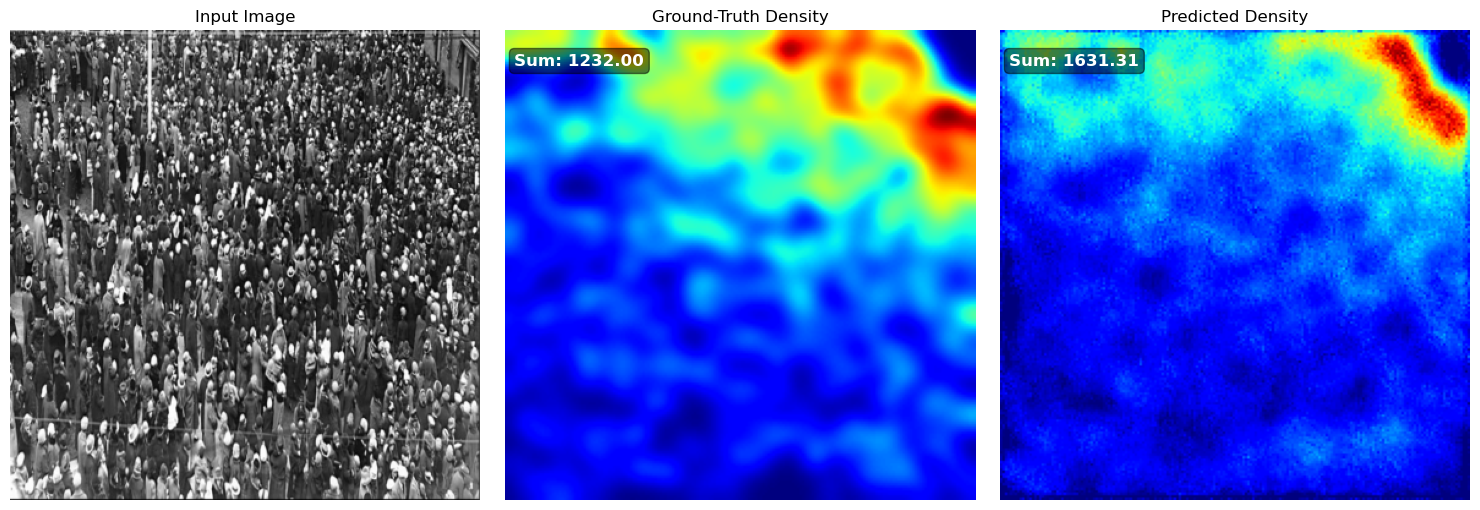

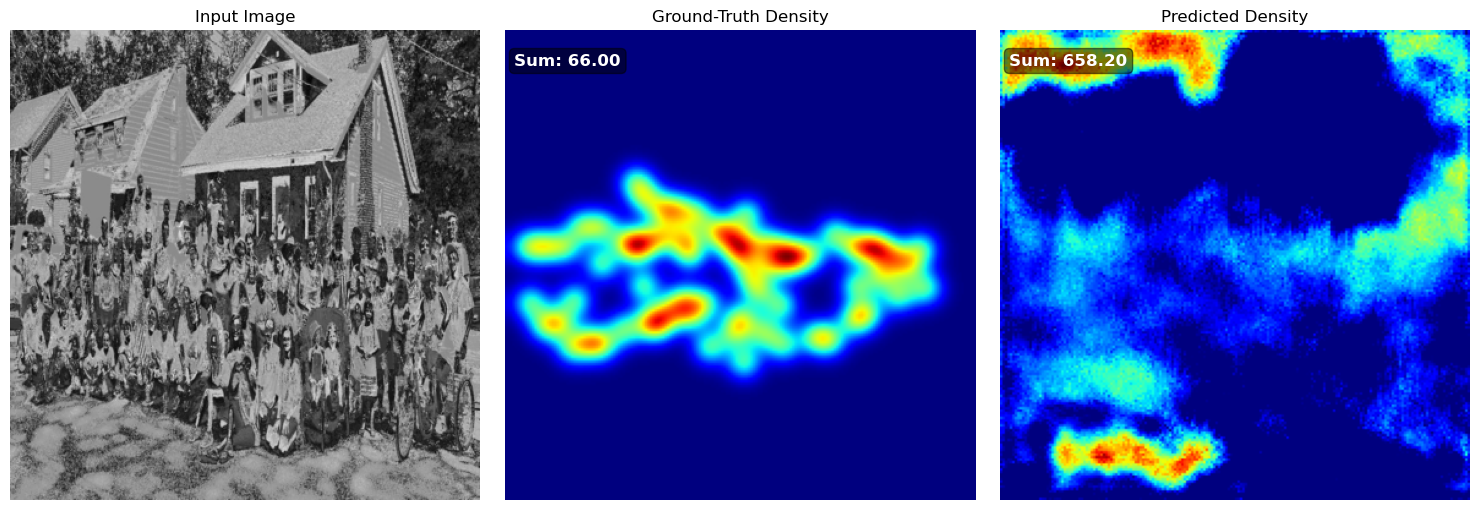

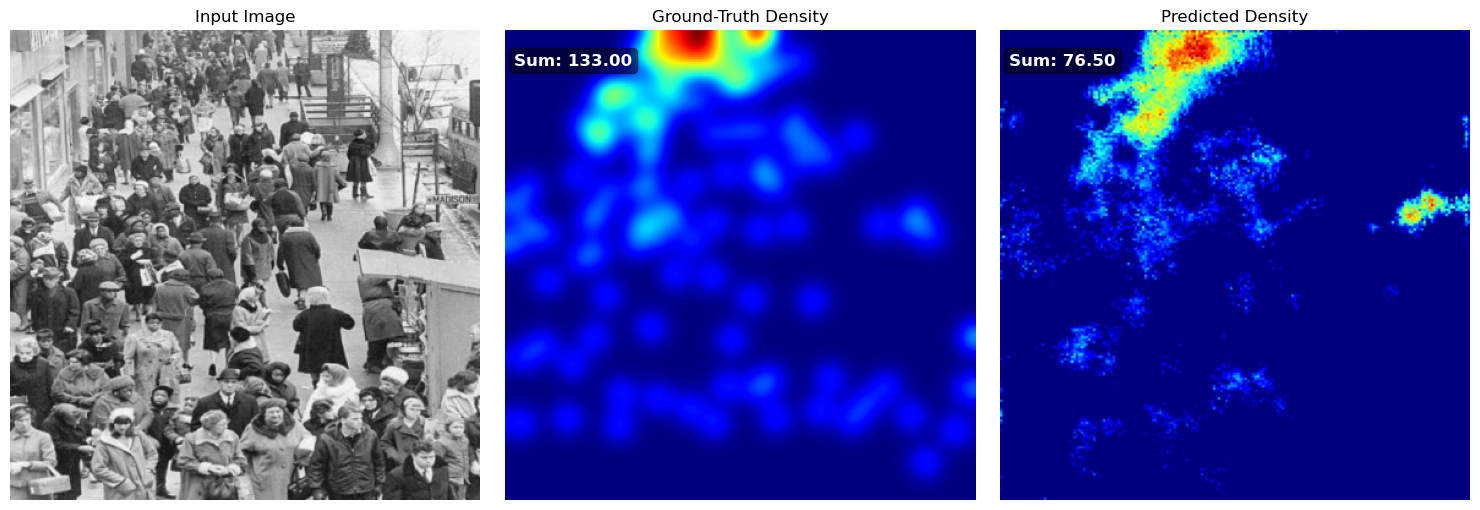

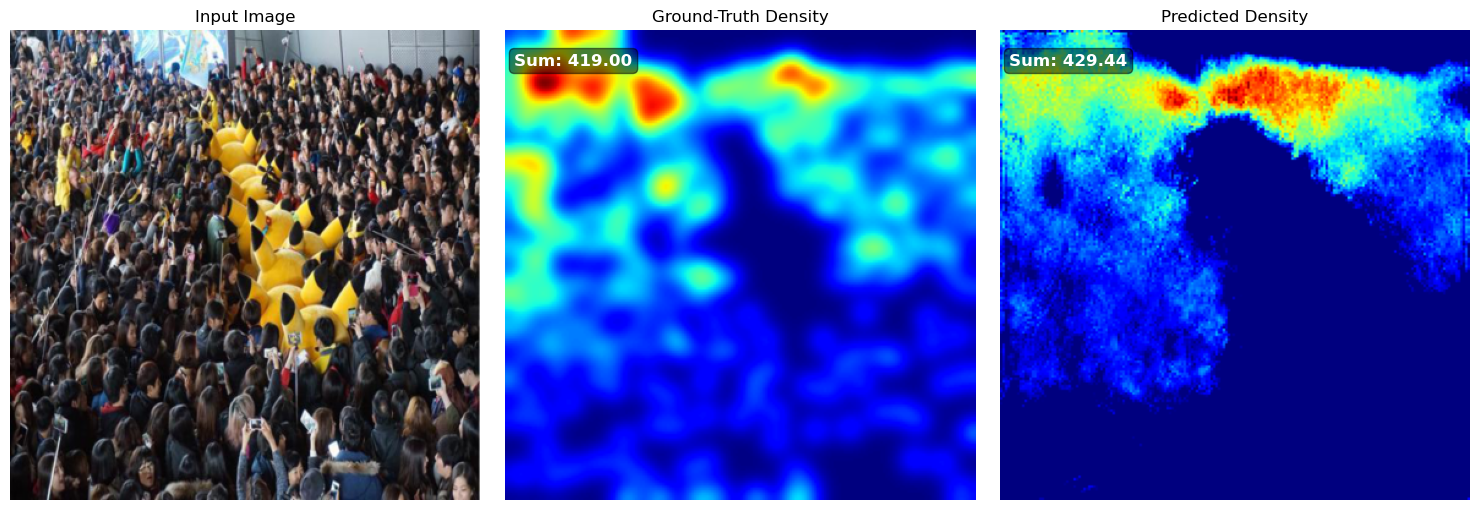

In [ ]:
model = train_model(
    data_module,
    model_name="resnet50",
    epochs=15,
    lr=1e-4,
    pretrained=True,
    save_path="../models/pth/part_A_resnet50.pth",
)

plot_density_predictions(
    model,
    data_module.test_dataloader(),
    device = "mps",
)

In [ ]:
model = train_model(
    data_module,
    model_name="resnet50",
    epochs=15,
    lr=1e-4,
    pretrained=True,
    save_path="../models/pth/part_A_resnet50.pth",
    depth=2
)

plot_density_predictions(
    model,
    data_module.test_dataloader(),
    device = "mps",
)

Using Apple MPS


Epoch 1/15 [Train]:   0%|          | 0/34 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


RuntimeError: Given groups=1, weight of size [1024, 3072, 3, 3], expected input[8, 768, 96, 96] to have 3072 channels, but got 768 channels instead

### VGG19bn Density map

Using Apple MPS


Epoch 1/15 [Train]:   0%|          | 0/34 [00:00<?, ?it/s]/opt/homebrew/Caskroom/miniconda/base/lib/python3.12/site-packages/torch/utils/data/dataloader.py:683: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, then device pinned memory won't be used.
  warnings.warn(warn_msg)


[vgg19_bn] Epoch 1/15  Train MSE: 0.005444, MAE: 0.002300  Val   MSE: 0.033318, MAE: 0.003073


[vgg19_bn] Epoch 2/15  Train MSE: 0.001047, MAE: 0.001206  Val   MSE: 0.001128, MAE: 0.001202


[vgg19_bn] Epoch 3/15  Train MSE: 0.000874, MAE: 0.001134  Val   MSE: 0.000964, MAE: 0.001107


[vgg19_bn] Epoch 4/15  Train MSE: 0.000697, MAE: 0.001061  Val   MSE: 0.001161, MAE: 0.001119


[vgg19_bn] Epoch 5/15  Train MSE: 0.000569, MAE: 0.000989  Val   MSE: 0.000853, MAE: 0.000985


[vgg19_bn] Epoch 6/15  Train MSE: 0.000595, MAE: 0.001007  Val   MSE: 0.000839, MAE: 0.000953


[vgg19_bn] Epoch 7/15  Train MSE: 0.000447, MAE: 0.000907  Val   MSE: 0.000818, MAE: 0.000926


[vgg19_bn] Epoch 8/15  Train MSE: 0.000321, MAE: 0.000795  Val   MSE: 0.000758, MAE: 0.000867


[vgg19_bn] Epoch 9/15  Train MSE: 0.000300, MAE: 0.000775  Val   MSE: 0.000701, MAE: 0.000798


[vgg19_bn] Epoch 10/15  Train MSE: 0.000266, MAE: 0.000729  Val   MSE: 0.000776, MAE: 0.000862


[vgg19_bn] Epoch 11/15  Train MSE: 0.000230, MAE: 0.000686  Val   MSE: 0.000730, MAE: 0.000795


[vgg19_bn] Epoch 12/15  Train MSE: 0.000259, MAE: 0.000685  Val   MSE: 0.001176, MAE: 0.001100


[vgg19_bn] Epoch 13/15  Train MSE: 0.000273, MAE: 0.000710  Val   MSE: 0.000763, MAE: 0.000786


[vgg19_bn] Epoch 14/15  Train MSE: 0.000217, MAE: 0.000645  Val   MSE: 0.000688, MAE: 0.000746


[vgg19_bn] Epoch 15/15  Train MSE: 0.000195, MAE: 0.000620  Val   MSE: 0.000709, MAE: 0.000756
Saved weights to ../models/pth/part_A_vgg19.pth


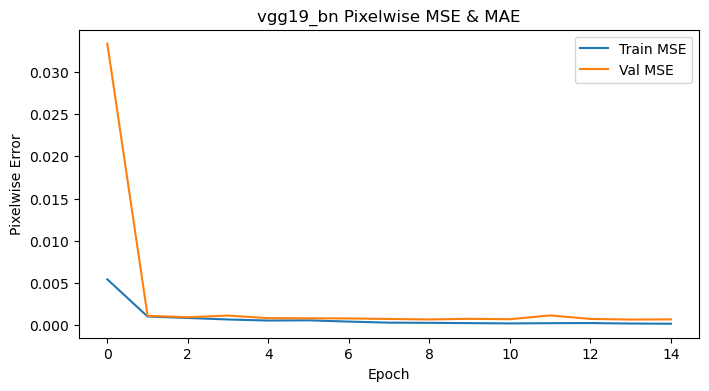

In [4]:
# 2) Train the model (15 epochs)
model = train_model(
    data_module,
    model_name="vgg19_bn",
    epochs=15,
    lr=1e-4,
    pretrained=True,
    save_path="../models/pth/part_A_vgg19.pth"
)


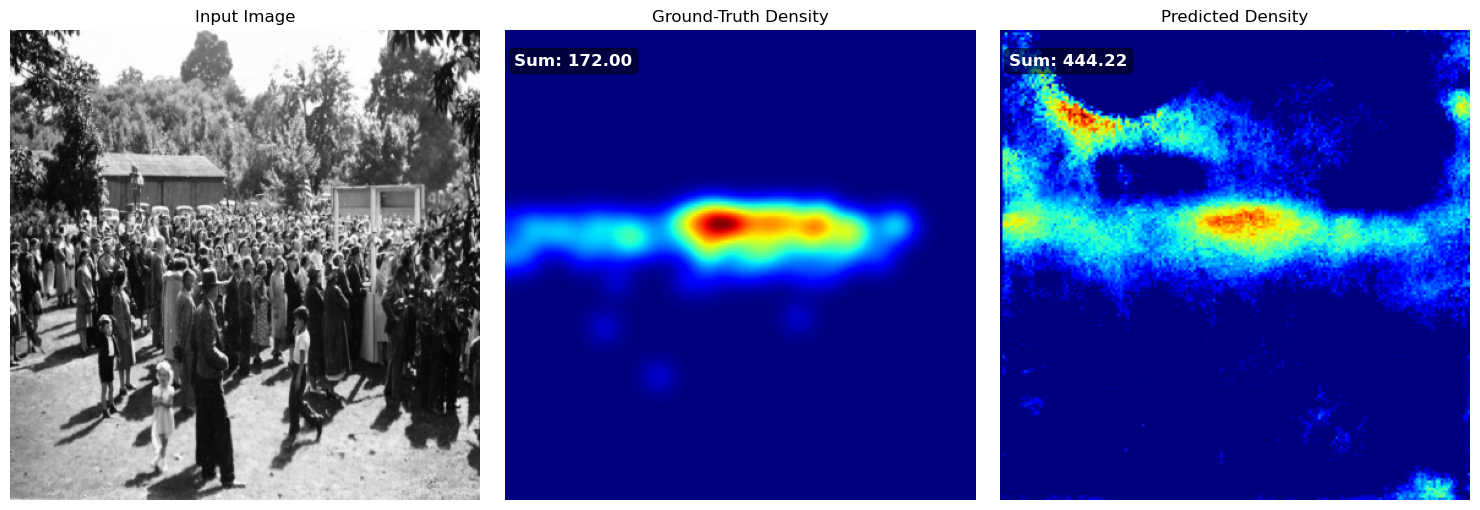

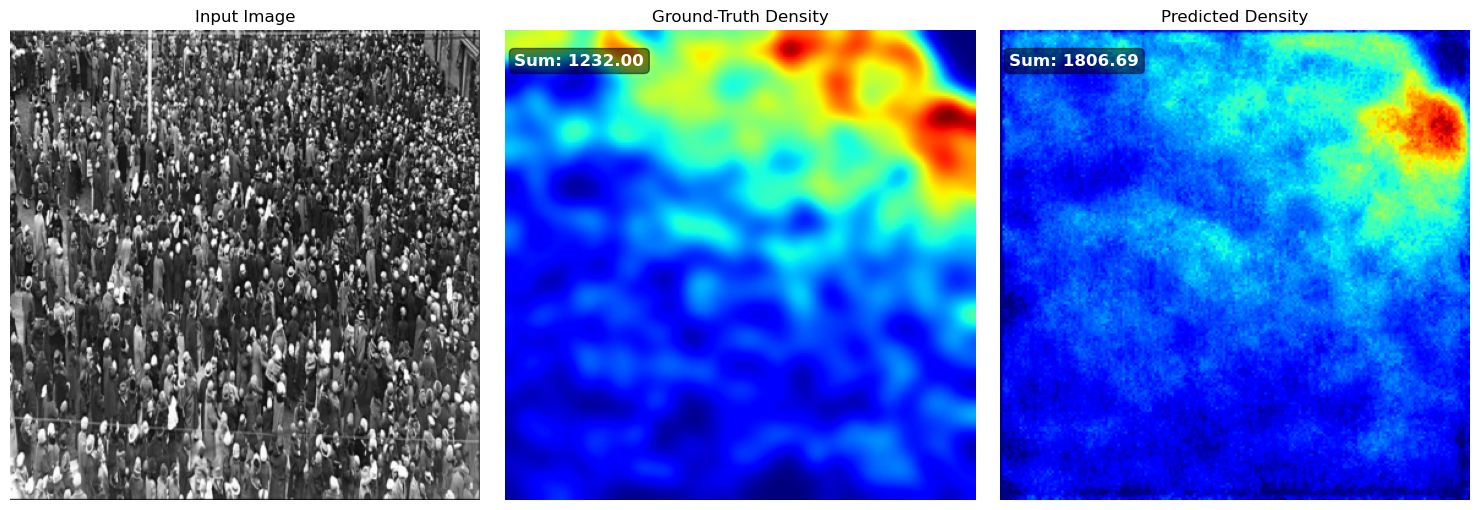

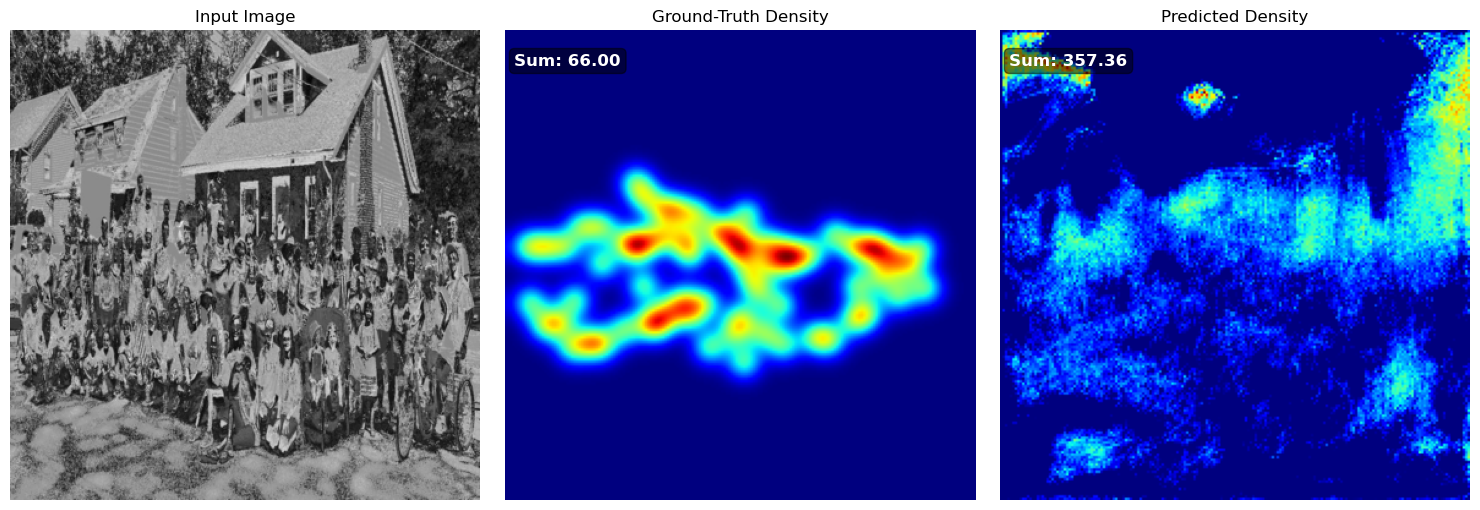

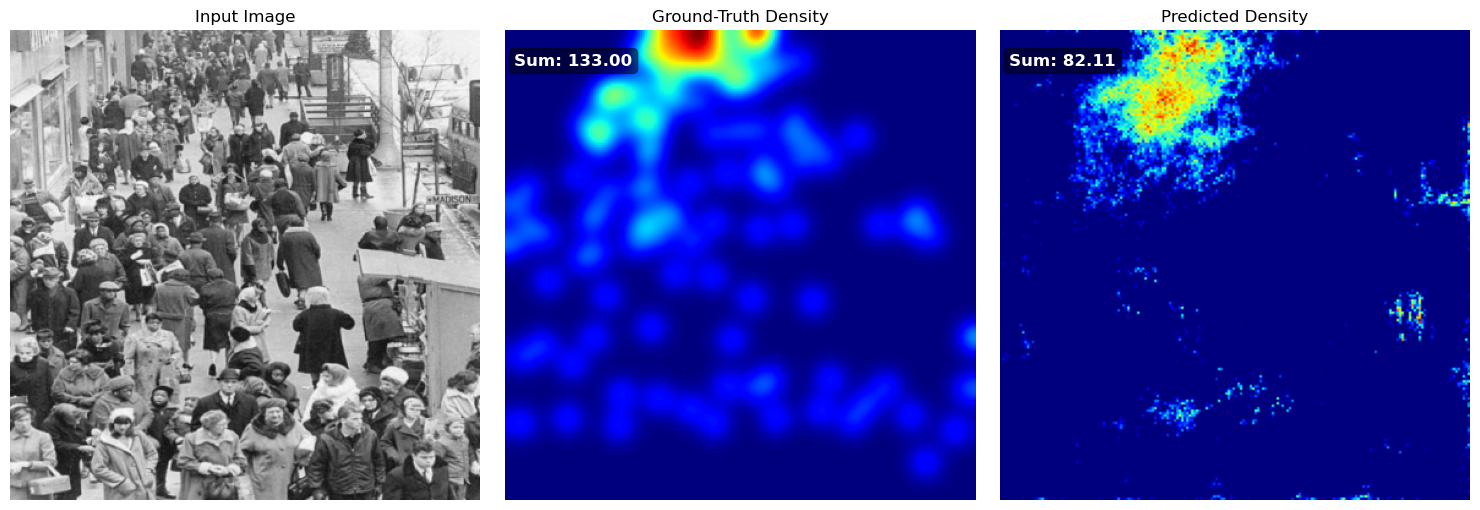

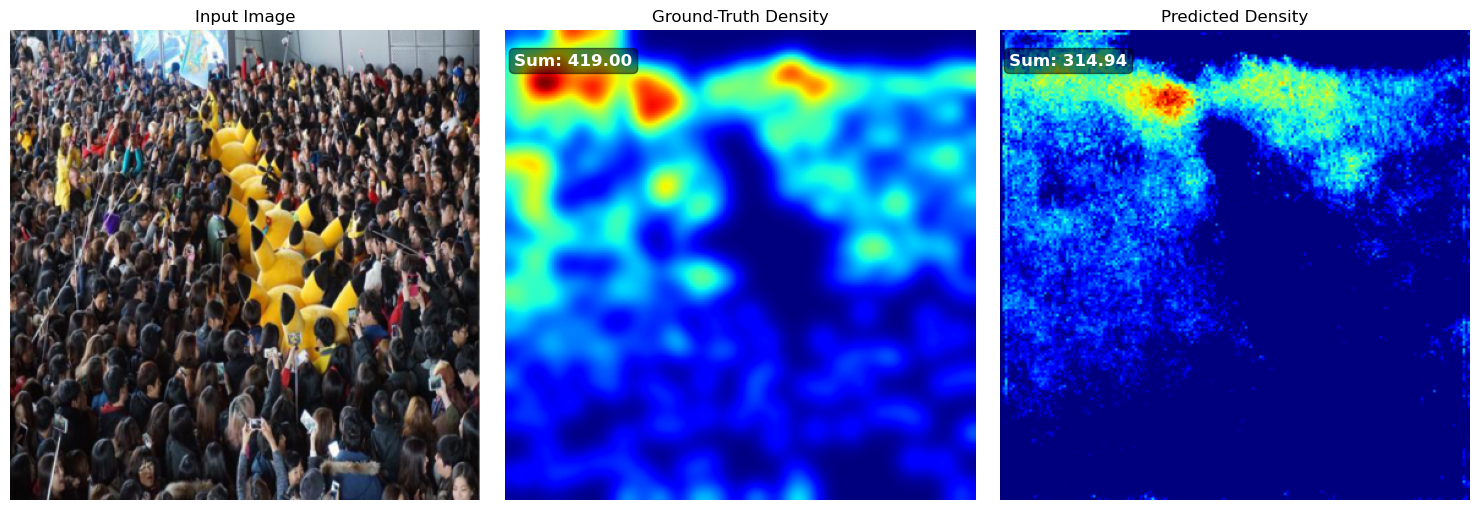

In [5]:
plot_density_predictions(
    model,
    data_module.test_dataloader(),
    device = "mps",
)

# Basic u-net

In [3]:
model = train_model(
    data_module,
    model_name="unet",
    epochs=50,
    lr=1e-5,
    pretrained=True,
    save_path="../models/pth/part_A_unet_64_4.pth",
    depth=4,
    num_filters=64,
)

Using Apple MPS


TypeError: UNet.__init__() got an unexpected keyword argument 'out_channels'

In [18]:
model = get_model("unet",
    pretrained=True,
    depth=4,
    num_filters=64,
    input_channels=3,
    output_channels=1,
)

model

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (downs): ModuleList(
    (0): Down(
      (down): Sequential(
        (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
        (1): DoubleConv(
          (double_conv): Sequential(
            (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
            (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
            (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), 

In [17]:
model = train_model(
    data_module,
    model_name="unet",
    epochs=50,
    lr=1e-5,
    pretrained=True,
    save_path="../models/pth/part_A_unet_64_4.pth",
    depth=4,
    num_filters=64,
)

Using Apple MPS


RuntimeError: Given groups=1, weight of size [512, 1536, 3, 3], expected input[8, 2048, 24, 24] to have 1536 channels, but got 2048 channels instead

In [ ]:
plot_density_predictions(
    model,
    data_module.test_dataloader(),
    device = "mps",
)

In [ ]:
total_params = sum(p.numel() for p in model.parameters())
print(f"Total parameters: {total_params} ({total_params / 1e6:.2f}M)")

In [ ]:
model = get_model("unet",
        cpt="../models/pth/part_A_unet.pth", device="mps")

In [ ]:
datloader = data_module.test_dataloader()

In [ ]:
plot_all_decoder_predictions(
    model, 
    datloader,
    device="mps",
    i=2,
)